In [6]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import os, random
import sys
from astropy.table import Table
import pandas as pd
import astropy

from data import KMTData
from data import OGLEData

random.seed(42)

In [73]:
kmt_dir = '/home/star/fb90/data/KMT/kmtnet/2017/2017/KB170053'

data = KMTData(kmt_dir)

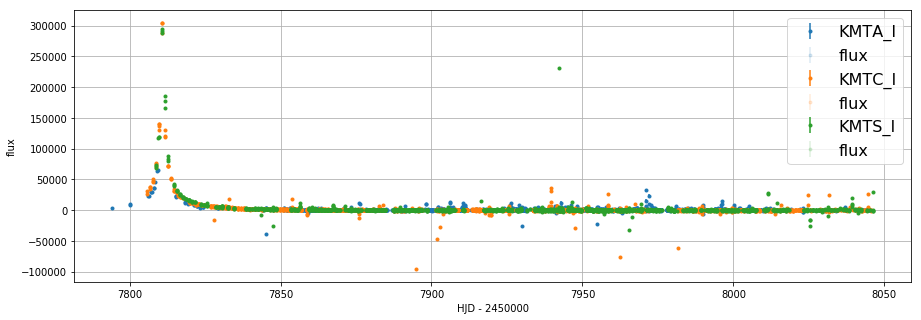

In [74]:
fig, ax = plt.subplots(figsize=(15,5))

data.plot(ax)

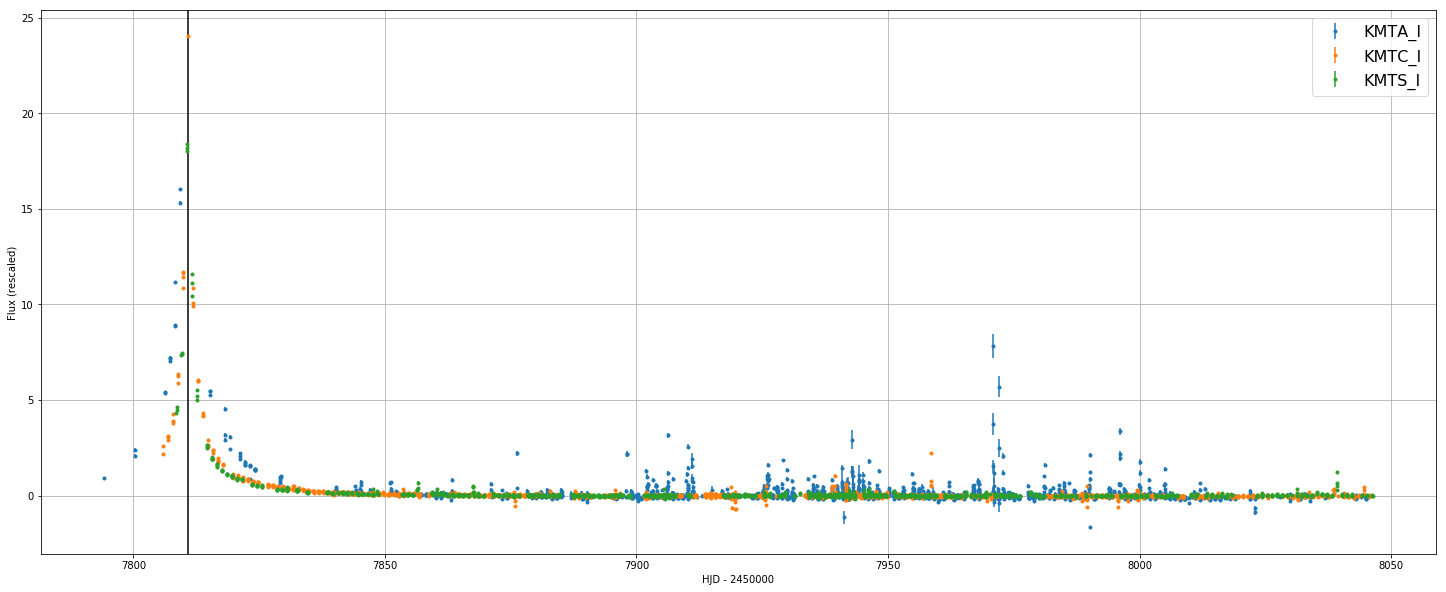

In [75]:
# %matplotlib qt
data.remove_worst_outliers()
fig, ax = plt.subplots(figsize=(25,10))
data.plot_standardized_data(ax)

def t0_guess(event):
    tmp = event.masks 
    event.remove_worst_outliers(window_size=30, mad_cutoff=2)
    tables = event.get_standardized_data()
    fluxes = np.concatenate([table['flux'] for table in tables])
    times = np.concatenate([table['HJD'] for table in tables])
    event.masks = tmp
    return np.median(times[fluxes > 4])


ax.axvline(t0_guess(data), color='black')